In [15]:
from datetime import datetime
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt

def show_figure(df, col):
    df.hist(column=col)
    plt.show()

In [16]:
#years = ['2018', '2017', '2016', '2015', '2014'] #cmpe491 subpart
years = ['2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011'] #cmpe492 extension
report_dates = []

# populating report_dates
for year in years:
    with open("dates_to_check_"+year+".txt", "r") as ins:
        for line in ins:
            report_dates.append(line.strip())
            

In [17]:
# output files
cumm_change = open("percentage_change_cumm.txt", "w+")
report_change = open("percentage_change_reports.txt", "w+")

# lists
per_change_list = []
per_change_reports_list = []

# Read price change data into lists
# Generate output files containing date$per_change
#stock_file = "THYAO2014-2018.csv" #cmpe491
stock_file = "THYAO2011-2018.csv" #cmpe492
with open(stock_file, "rt") as infile:
    infile.readline()  
    read = csv.reader(infile, delimiter=",")
    for row in read :
        date = row[0]
        change = row[-1][0:-1]
        change = change.replace(',', '.')        
        if date in report_dates:
            report_change.write(date+"$"+change+'\n')
            per_change_reports_list.append(float(change))
        cumm_change.write(date+"$"+change+'\n')
        per_change_list.append(float(change))


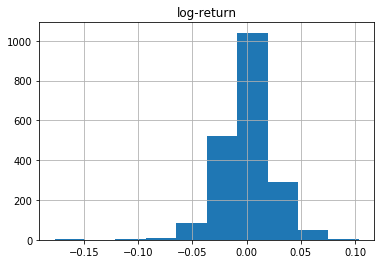

In [18]:
# Histogram of all datas log return
df_all = pd.read_csv("percentage_change_cumm.txt", sep="$", names=['date', 'change'])
df_all['change'] = df_all['change'].astype('float64')
df_all['change'] = df_all['change']/100 +1
df_all['log-return'] = np.log(df_all['change'])
show_figure(df_all, 'log-return')

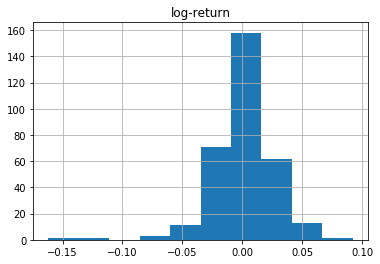

In [19]:
# Histogram of report days' log return
df_rep = pd.read_csv("percentage_change_reports.txt", sep="$", names=['date', 'change'])
df_rep['change'] = df_rep['change'].astype('float64')
df_rep['change'] = df_rep['change']/100 +1
df_rep['log-return'] = np.log(df_rep['change'])
show_figure(df_rep, 'log-return')